# **Machine Learning I | Final Project**

        
## Wizardry School Enrollment

*Group 08*

*Group members* : Carolina Almeida (20221855), Duarte Carvalho (20221900), Francisco Gomes (20221810), Maria Henriques (20221952) and Marta Monteiro (20221954).</p>

-----------------------------------------

### Table of Contents

* [1. Data Preparation](#1)
    * [1.1 Importing the Datasets and Libraries](#1.1)
    * [1.2 Preliminary Data Analysis and Arrangements](#1.2)

<br>

* [2. Data Exploration and Treatment](#2)
    * [2.1 Summary Data Analysis](#2.1)
    * [2.2 Feature Distributions in Relation to the Target and Outlier Detection](#2.2)
        * [2.2.1 Numerical Data](#2.2.1)
        * [2.2.2 Categorical Data](#2.2.2)
    * [2.3 Feature Engineering](#2.3)
    * [2.4 Data Partitioning](#2.4)
    * [2.5 Encoding](#2.5)
    * [2.6 Scaling](#2.6)

<br>

* [3. Feature Selection](#3)
    * [3.1 Filter Methods](#3.1)
        * [3.1.1 Univariate Variables](#3.1.1)
        * [3.1.2 Spearman's Correlation Analysis](#3.1.2)
        * [3.1.3 Chi-Square Test](#3.1.3)
    * [3.2 Wrapper Methods](#3.2)
        * [3.2.1 Recursive Feature Elimination (RFE)](#3.2.1)
        * [3.2.2 Sequential Forward Selection (SFS)](#3.2.2)
    * [3.3 Embedded Methods](#3.3)
        * [3.3.1 Lasso Regression](#3.3.1)
        * [3.3.2 Decision Tree](#3.3.2)
    * [3.4 Final Insights](#3.4)

<br>

* [4. Model Experimentation and Criteria for Evaluation](#4)
    * [4.1 Model Choice](#4.1)
    * [4.2 Fitting the Model](#4.2)
    * [4.3 Making Predictions](#4.3)
    * [4.4. Making predictions](#4.4)

<br>

* [5. Extracting Predictions](#5)

-----------------------------------------

<a id="1"></a>

# **1. Data Preparation <font>**

<a id="1.1"></a>
    
## **1.1. Importing the datasets and libraries <font>**

This section, as mentioned in the title, is intended for importing the data and necessary libraries.

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.preprocessing import OneHotEncoder

# Imputation
from sklearn.metrics import mean_squared_error
import random
from sklearn.impute import KNNImputer

# Feature selection and scaling
import scipy.stats as stats
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler

#Performance Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,  recall_score, classification_report,  balanced_accuracy_score

#Model Selection
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Model evaluation
from sklearn.model_selection import KFold, RepeatedKFold

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Training set
train_data = pd.read_csv('Project_train_dataset.csv')

# Testing set
test_data = pd.read_csv('Project_test_dataset.csv')

<a id="1.2"></a>
    
## 1.2. Preliminary Data Analysis and Arrangements<font>

In this part, we extracted some initial information regarding data types, missing values and memory usage.

In [ ]:
# Training set
train_data_copy = train_data.copy()

# Testing set
test_data_copy = test_data.copy()

In [ ]:
# Check the training set
display(train_data_copy.head())

# Check the testing set
display(test_data_copy.head())

,Student ID,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
0,1,Sorcery School,male,22.0,1,0,7.2500,NaN,Mystic Academy,18,Fire,0
1,2,Magi Academy,female,38.0,1,0,71.2833,Cottage Chamber,Eldertree Enclave,7,Fire,1
2,3,Sorcery School,female,26.0,0,0,7.9250,NaN,Mystic Academy,12,Air,1
3,5,Sorcery School,male,35.0,0,0,8.0500,NaN,Mystic Academy,12,Air,0
4,6,Sorcery School,male,NaN,0,0,8.4583,NaN,Arcan Institute,11,Earth,0


,Student ID,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Favourite Study Element
0,836,Magi Academy,female,39.0,1,1,83.1583,Mystical Chamber,Eldertree Enclave,16,Fire
1,323,Witchcraft Institute,female,30.0,0,0,12.3500,NaN,Arcan Institute,1,Earth
2,117,Sorcery School,male,70.5,0,0,7.7500,NaN,Arcan Institute,9,Earth
3,444,Witchcraft Institute,female,28.0,0,0,13.0000,NaN,Mystic Academy,9,Air
4,619,Witchcraft Institute,female,4.0,2,1,39.0000,Python Quarters,Mystic Academy,8,Water


In [ ]:
# Check the data types and memory usage -> Training set
display(train_data_copy.info(memory_usage='deep'))

# Check the data types and memory usage -> Testing set
display(test_data_copy.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student ID                713 non-null    int64  
 1   Program                   713 non-null    object 
 2   Student Gender            713 non-null    object 
 3   Experience Level          567 non-null    float64
 4   Student Siblings          713 non-null    int64  
 5   Student Family            713 non-null    int64  
 6   Financial Background      713 non-null    float64
 7   School Dormitory          153 non-null    object 
 8   School of Origin          713 non-null    object 
 9   Student Social Influence  713 non-null    int64  
 10  Favourite Study Element   713 non-null    object 
 11  Admitted in School        713 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 252.9 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student ID                176 non-null    int64  
 1   Program                   176 non-null    object 
 2   Student Gender            176 non-null    object 
 3   Experience Level          145 non-null    float64
 4   Student Siblings          176 non-null    int64  
 5   Student Family            176 non-null    int64  
 6   Financial Background      176 non-null    float64
 7   School Dormitory          49 non-null     object 
 8   School of Origin          176 non-null    object 
 9   Student Social Influence  176 non-null    int64  
 10  Favourite Study Element   176 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 61.6 KB


None

Converting data types plays a crucial role in optimizing memory efficiency and ensuring compatibility with the chosen machine learning models. By selecting the most appropriate data types, we can reduce memory usage, which is particularly important when dealing with extensive datasets.

Additionally, we make sure that the data types align with the expectations of the machine learning algorithms used, promoting a smooth analysis and modeling process. This practice not only improves project performance but also facilitates more effective decision-making based on the results obtained through machine learning.

That said, and based on the cell above we can conclude that all the variables, except for 'Financial Background', can be assigned different data types:

<u>Student ID</u>: int16

<u>Program</u>: category

<u>Student Gender</u>: category

<u>Experience Level</u>: float16

<u>Student Siblings</u>: int8

<u>Student Family</u>: int8

<u>School Dormitory</u>: category

<u>School of Origin</u>: category

<u>Student Social Influence</u>: int8

<u>Favourite Study Element</u>: category

<u>Admitted in School</u>: bool

In [ ]:
# Convert the data types -> Training set
train_data_copy = train_data_copy.astype({'Student ID': 'int16',
                                          'Program': 'category',
                                          'Student Gender': 'category',
                                          'Experience Level': 'float16',
                                          'Student Siblings': 'int8',
                                          'Student Family': 'int8',
                                          'School Dormitory': 'category',
                                          'School of Origin': 'category',
                                          'Student Social Influence': 'int8',
                                          'Favourite Study Element': 'category',
                                          'Admitted in School': 'bool'})

# Convert the data types -> Testing set
test_data_copy = test_data_copy.astype({'Student ID': 'int16',
                                          'Program': 'category',
                                          'Student Gender': 'category',
                                          'Experience Level': 'float16',
                                          'Student Siblings': 'int8',
                                          'Student Family': 'int8',
                                          'School Dormitory': 'category',
                                          'School of Origin': 'category',
                                          'Student Social Influence': 'int8',
                                          'Favourite Study Element': 'category',})

In [ ]:
# Check the decrease in memory usage -> Training set
display(train_data_copy.info(memory_usage='deep'))

# Check the decrease in memory usage -> Testing set
display(test_data_copy.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Student ID                713 non-null    int16   
 1   Program                   713 non-null    category
 2   Student Gender            713 non-null    category
 3   Experience Level          567 non-null    float16 
 4   Student Siblings          713 non-null    int8    
 5   Student Family            713 non-null    int8    
 6   Financial Background      713 non-null    float64 
 7   School Dormitory          153 non-null    category
 8   School of Origin          713 non-null    category
 9   Student Social Influence  713 non-null    int8    
 10  Favourite Study Element   713 non-null    category
 11  Admitted in School        713 non-null    bool    
dtypes: bool(1), category(5), float16(1), float64(1), int16(1), int8(3)
memory usage: 16.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Student ID                176 non-null    int16   
 1   Program                   176 non-null    category
 2   Student Gender            176 non-null    category
 3   Experience Level          145 non-null    float16 
 4   Student Siblings          176 non-null    int8    
 5   Student Family            176 non-null    int8    
 6   Financial Background      176 non-null    float64 
 7   School Dormitory          49 non-null     category
 8   School of Origin          176 non-null    category
 9   Student Social Influence  176 non-null    int8    
 10  Favourite Study Element   176 non-null    category
dtypes: category(5), float16(1), float64(1), int16(1), int8(3)
memory usage: 5.3 KB


None

Based on the information available for the training and test sets, it can be inferred that the "Experience Level" and "School Dormitory" features have missing values.

In [ ]:
# More than 50% of the School Dormitory values are missing, hence why we will drop this column -> Training set
train_data_copy = train_data_copy.drop('School Dormitory', axis = 1)

# More than 50% of the School Dormitory values are missing, hence why we will drop this column -> Testing set
test_data_copy = test_data_copy.drop('School Dormitory', axis = 1)

Given that more than 50% of the values in the “Experience Level” column are not null, we chose not to eliminate this column. Instead, we used the KNN Imputer method to fill in the missing values. The function we created to determine the ideal number of neighbors for imputation is presented below.

In [ ]:
# Create two copies of the data
complete_data = train_data_copy[train_data_copy['Experience Level'].notna()]
complete_data_copy = complete_data.copy()

# Generate Missing Values
n_missing = int(complete_data.shape[0] * 0.1)
missing_indices = random.sample(list(complete_data.index), n_missing)
complete_data_copy.loc[missing_indices, 'Experience Level'] = np.nan

# Store original values for later comparison
original_values = complete_data.loc[missing_indices, 'Experience Level']

# Imputation with KNN for Various k
mse_scores = []
for k in range(1, 11):
    imputer = KNNImputer(n_neighbors=k)
    imputed_data = imputer.fit_transform(complete_data_copy[['Experience Level']])
    imputed_values = imputed_data[np.isin(complete_data_copy.index, missing_indices)]

    # Calculate Mean Squared Error (MSE) between original and imputed values
    mse = mean_squared_error(original_values, imputed_values)
    mse_scores.append(mse)

# Find the Best k
best_k = range(1, 11)[np.argmin(mse_scores)]

# Display the result
print(f"The best number of k's is: {best_k}")

The best number of k's is: 1


This function performs KNN imputation for various k values (from 1 to 10) and calculates the Mean Squared Error (MSE) between the original and imputed values. The k value that minimizes the MSE is considered the best. This method allows us to effectively handle missing values in the “Experience Level” column, preserving most of the original information.

Knowing that the best number of neighbours is 1, we proceed with the imputation of values for both the training and testing datasets.

In [ ]:
imputer_train = KNNImputer(n_neighbors = 1)

# To fill the missing values in Experience Level we will use the KNN Imputer -> Training set
train_data_copy['Experience Level'] = imputer_train.fit_transform(train_data_copy[['Experience Level']])

# To fill the missing values in Experience Level we will use the KNN Imputer -> Testing set
test_data_copy['Experience Level'] = imputer_train.transform(test_data_copy[['Experience Level']])

In [ ]:
# Check the decrease in memory usage -> Training set
display(train_data_copy.info(memory_usage='deep'))

# Check the decrease in memory usage -> Testing set
display(test_data_copy.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Student ID                713 non-null    int16   
 1   Program                   713 non-null    category
 2   Student Gender            713 non-null    category
 3   Experience Level          713 non-null    float16 
 4   Student Siblings          713 non-null    int8    
 5   Student Family            713 non-null    int8    
 6   Financial Background      713 non-null    float64 
 7   School of Origin          713 non-null    category
 8   Student Social Influence  713 non-null    int8    
 9   Favourite Study Element   713 non-null    category
 10  Admitted in School        713 non-null    bool    
dtypes: bool(1), category(4), float16(1), float64(1), int16(1), int8(3)
memory usage: 15.3 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Student ID                176 non-null    int16   
 1   Program                   176 non-null    category
 2   Student Gender            176 non-null    category
 3   Experience Level          176 non-null    float16 
 4   Student Siblings          176 non-null    int8    
 5   Student Family            176 non-null    int8    
 6   Financial Background      176 non-null    float64 
 7   School of Origin          176 non-null    category
 8   Student Social Influence  176 non-null    int8    
 9   Favourite Study Element   176 non-null    category
dtypes: category(4), float16(1), float64(1), int16(1), int8(3)
memory usage: 4.7 KB


None

After applying the modifications above, we can observe that the decrease in memory usage is clear.

<a id="2"></a>
    
# **<font color='#00000'> 2. Data Exploration and Treatment <font>**

This section aims to extract useful data insights.

<a id="2.1"></a>
    
## <font color='#00000'> 2.1 Summary Analysis <font>

In [ ]:
# Check the descriptive statistics of the training and the testing datasets
display(train_data_copy.describe().T)
display(test_data_copy.describe().T)

,count,mean,std,min,25%,50%,75%,max
Student ID,713.0,443.402525,257.180421,1.000000,219.000,446.000000,666.0,889.0000
Experience Level,713.0,29.890625,13.015625,0.419922,22.000,29.890625,35.0,80.0000
Student Siblings,713.0,0.521739,1.057287,0.000000,0.000,0.000000,1.0,8.0000
Student Family,713.0,0.354839,0.770985,0.000000,0.000,0.000000,0.0,6.0000
Financial Background,713.0,31.327238,50.903034,0.000000,7.925,14.400000,30.0,512.3292
Student Social Influence,713.0,12.719495,6.949648,1.000000,7.000,13.000000,19.0,24.0000


,count,mean,std,min,25%,50%,75%,max
Student ID,176.0,456.522727,256.720414,4.0,269.7500,446.000000,679.2500,891.000
Experience Level,176.0,28.890625,12.773438,1.0,21.0000,29.890625,34.0000,70.500
Student Siblings,176.0,0.534091,1.277935,0.0,0.0000,0.000000,1.0000,8.000
Student Family,176.0,0.494318,0.931954,0.0,0.0000,0.000000,1.0000,5.000
Financial Background,176.0,35.213800,44.478617,0.0,7.8958,15.795850,39.6875,262.375
Student Social Influence,176.0,12.630682,6.483824,1.0,7.0000,13.000000,18.0000,24.000


**What are some insights that we can take?**

By looking at the standard deviation we can conclude that <u>Student Siblings</u> and <u>Student Family</u> have the lowest standard deviations amongst the variables.

Taking a closer look at these two variables, we can conclude that, half of the students (50%) have no siblings or family members attending the school with the latter variable extending this observation to the majority (75%).

Also, despite being difficult to confirm at this stage, we note the existence of potencial outliers, due to the maximum values that differ greatly from the others. This can be seen on the following variables: <u>Experience Level</u> whose maximum value is 80, <u>Student Siblings</u> where the maximum is 8, and <u>Financial Background</u> in which it is 512.5.

In [ ]:
# Functions to find outliers on the left and right sides

def outliers_left(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers_left = q1 - 1.5 * IQR
    return outliers_left

def outliers_right(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers_right = q3 + 1.5 * IQR
    return outliers_right

# Check for outliers in each column, except for 'Student ID'

numerical_features = ['Experience Level', 'Student Siblings', 'Student Family', 'Financial Background', 'Student Social Influence']

for column in numerical_features:
    outlier_left = outliers_left(train_data_copy[column])
    outlier_right = outliers_right(train_data_copy[column])
    outliers = train_data_copy[(train_data_copy[column] < outlier_left) | (train_data_copy[column] > outlier_right)]

    print(f"Column: {column}")

    if not outliers.empty:
        print("There are outliers in this column.")
    else:
        print("There are no outliers in this column.")

    print("\n")

Column: Experience Level
There are outliers in this column.


Column: Student Siblings
There are outliers in this column.


Column: Student Family
There are outliers in this column.


Column: Financial Background
There are outliers in this column.


Column: Student Social Influence
There are no outliers in this column.




We can confirm our assumptions, since there are outliers on the variables, <u>Experience Level</u>, <u>Student Siblings</u> and <u>Financial Background</u>. Also, it wasn't mentioned previously, but the variable <u>Student Family</u> also has outliers.

In [ ]:
# Distribution of the target variable
print(train_data_copy['Admitted in School'].value_counts())
print(str(round(len(train_data_copy[train_data_copy['Admitted in School'] == 1])/ len(train_data_copy) * 100, 2)) + '% of students pass')

False    461
True     252
Name: Admitted in School, dtype: int64
35.34% of students pass


The uneven distribution of the target variable <u>Admitted in School</u> indicates that we are dealing with an unbalanced dataset, having only 35.34% of students admitted.

To navigate these challenges, it's crucial to consider alternative evaluation metrics, such as precision, recall, and F1-score, which provide a more nuanced understanding of the model's performance in the context of unbalanced data.

In summary, the imbalance in the <u>Admitted in School</u> classes should be addressed with care to ensure that machine learning models can effectively capture the patterns present in both the admitted and not admitted groups.

<a id="2.2"></a>   

## <font color='#00000'> 2.2 Feature Distributions in Relation to the Target and Outliers Detection <font>

| Admission Status | Color |
|:-----------------:|:-----:|
| **Admitted**      | <span style="color:green">Dark Green|
| **Not Admitted**  | <span style="color:silver">Silver|

In [ ]:
# Define a custom color palette

my_palette = ['silver', 'darkgreen']

<a id="2.2.1"></a>       

### <font color='#00000'>2.2.1 Numerical Data<font>

**Binning for Visualization**

To simplify visualization, some features with wide ranges were binned into intervals.
<br>
This approach aids in creating clearer representations, particularly in histograms. Additionally, it transforms continuous features into categorical ones, enhancing the performance of machine learning models.
<br>
The careful selection of bin sizes ensures meaningful insights without sacrificing important information.

In [ ]:
# Experience Level
train_data_copy['Experience Level Binned'] = pd.cut(train_data_copy['Experience Level'],
                                                  bins = [0, 10, 20, 30, 40, 50, 60, 70, 80],
                                                  include_lowest = False,
                                                  right = False)


In [ ]:
# Financial Background
train_data_copy['Financial Background Binned'] = pd.cut(train_data_copy['Financial Background'],
                                                  bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
                                                  include_lowest = False,
                                                  right = False)

**Visualization**

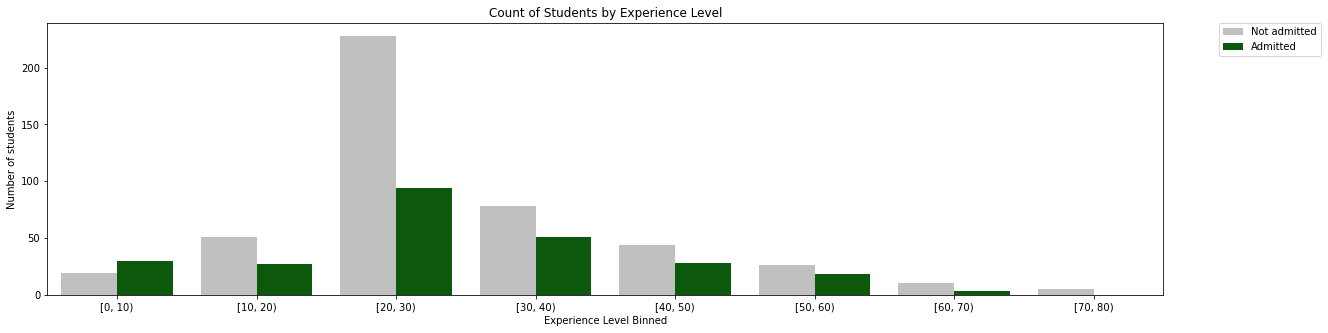

In [ ]:
# Students by Experience Level

plt.figure(figsize = (20, 5))

sns.countplot(data = train_data_copy, x = 'Experience Level Binned', hue = 'Admitted in School', palette = my_palette).set(title = 'Count of Students by Experience Level')

plt.legend(['Not admitted', 'Admitted'], bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

plt.ylabel('Number of students')

plt.show()

Upon analysis, it becomes evident that the majority of students, irrespective of admission status, fall within the experience level range of 20 to 30.
<br>
This observation underscores the significance of delineating experience levels into intervals for a more nuanced exploration of the student population.

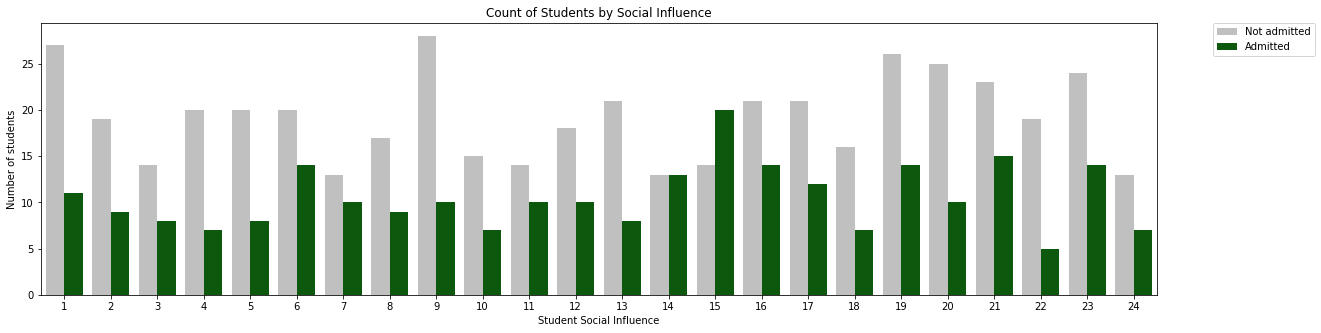

In [ ]:
# Students by Social Influence

plt.figure(figsize = (20, 5))

sns.countplot(data = train_data_copy, x = 'Student Social Influence', hue = 'Admitted in School', palette = my_palette).set(title = 'Count of Students by Social Influence')

plt.legend(['Not admitted', 'Admitted'], bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

plt.ylabel('Number of students')

plt.show()

The distribution is relatively normal as it isn't skewed nor outliers appear to exist.

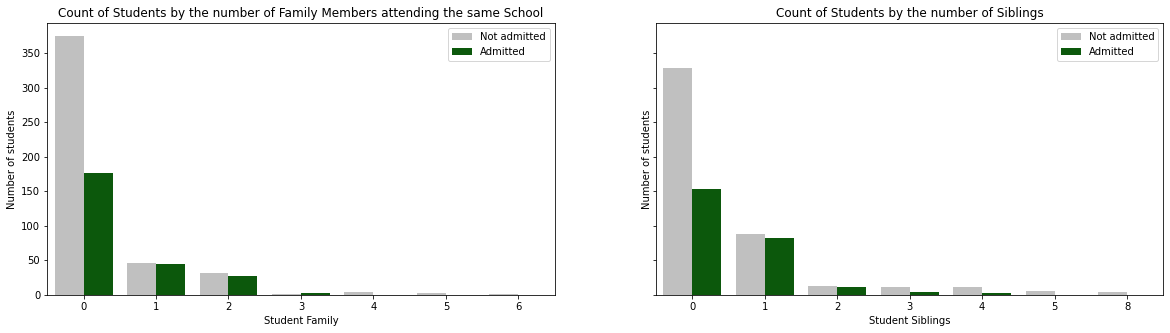

In [ ]:
# Students by number of Family Members attending the same school and by number of Siblings

fig, axes = plt.subplots(1, 2, figsize = (20, 5), sharey = True)

sns.countplot(ax = axes[0], data = train_data_copy, x = 'Student Family', palette = my_palette, hue = 'Admitted in School').set(title = 'Count of Students by the number of Family Members attending the same School')
axes[0].set_ylabel('Number of students')

sns.countplot(ax = axes[1], data = train_data_copy, x = 'Student Siblings', palette = my_palette, hue = 'Admitted in School').set(title = 'Count of Students by the number of Siblings')
axes[1].set_ylabel('Number of students')

for ax in axes:
    ax.legend(['Not admitted', 'Admitted'], loc = "upper right")

plt.show()

As expected we note a positive correlation between the number of siblings and the number of family members attending the same school. Hence, a strong connection is evident between these two graphs, leading to a nearly identical skewness in both.
<br>
Also, it becomes evident that the majority of students, irrespective of admission status, have 0 siblings or family members attending the same school.
<br>
To conclude, it is noticeable the presence of some outliers in both graphs.

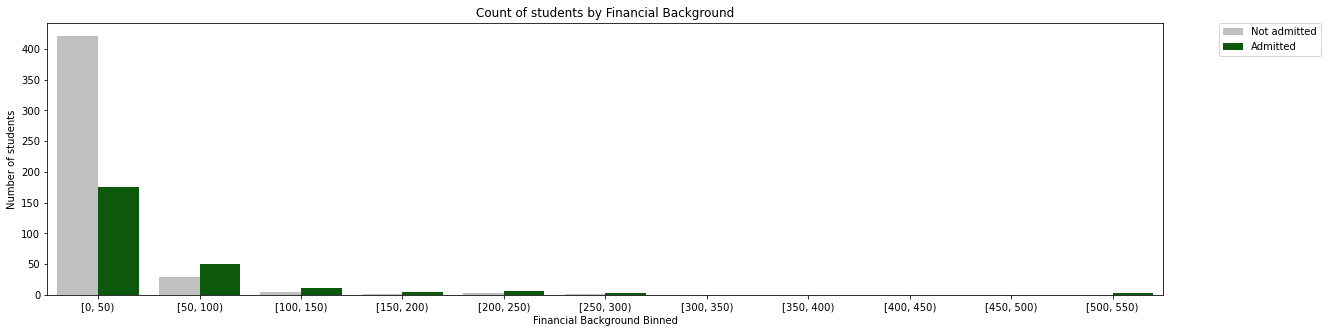

In [ ]:
# Students by Financial Background

plt.figure(figsize = (20, 5))

sns.countplot(data = train_data_copy, x = 'Financial Background Binned', hue = 'Admitted in School', palette = my_palette).set(title = "Count of students by Financial Background")

plt.legend(['Not admitted', 'Admitted'], bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

plt.ylabel('Number of students')

plt.show()

It is noticeable that among both admitted and non-admitted individuals, there is a significant prevalence of those with a financial background concentrated between 0 and 50.
<br>
We can clearly note some outliers on the right-hand side of the graph.

<a id="2.2.2"></a>    

### <font color='#00000'>2.2.2 Categorical Data<font>

The provided function is designed to depict the distribution of categorical features concerning the target variable using stacked bar charts.
<br>
This visualization is presented in both absolute and relative terms.

In [ ]:
def stacked_bar_charts(df, feature, target):
    contingency_table = pd.crosstab(df[feature], df[target], margins = True) # Frequency of occurrences for each combination of the categorical feature and the binary target variable.
    categories = contingency_table.index[:-1]

    fig = plt.figure(figsize = (20, 5))

    # Frequency Bar Chart
    plt.subplot(121) # 1 row, 2 columns, subplot 1
    bottom = plt.bar(categories, contingency_table.iloc[:-1, 0].values, 0.5, color = "silver") # The width of the bars is 0.5
    top = plt.bar(categories, contingency_table.iloc[:-1, 1].values, 0.5, bottom = contingency_table.iloc[:-1, 0], color = "darkgreen")
    plt.legend((top[0], bottom[0]), ('Admitted', 'Not admitted'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    # Proportion Bar Chart
    proportions = np.array([np.divide(contingency_table.iloc[:-1, 0].values, contingency_table.iloc[:-1, 2].values), np.divide(contingency_table.iloc[:-1, 1].values, contingency_table.iloc[:-1, 2].values)])
    plt.subplot(122) # 1 row, 2 columns, subplot 2
    bottom = plt.bar(categories, proportions[0], 0.5, color = "silver")
    top = plt.bar(categories, proportions[1], 0.5, bottom = proportions[0], color = "darkgreen")
    plt.legend((top[0], bottom[0]), ('Admitted', 'Not admitted'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("Proportion")

    plt.show()

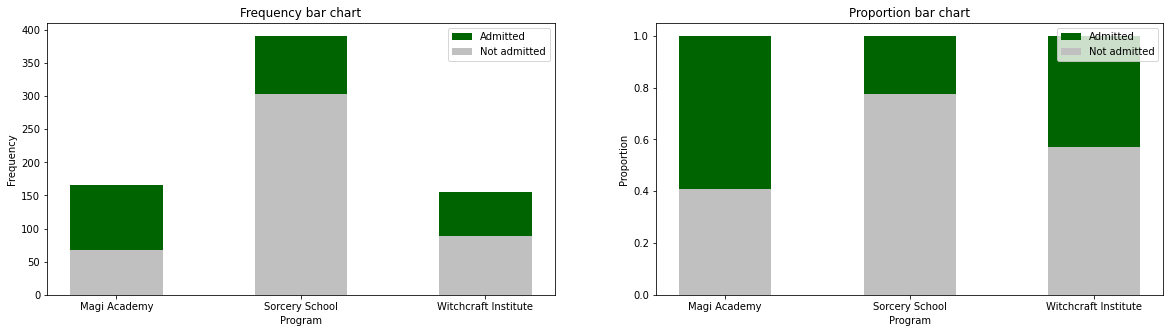

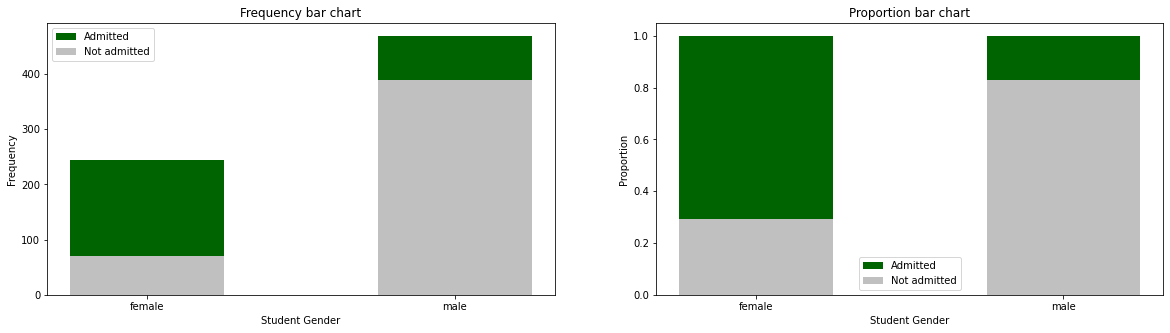

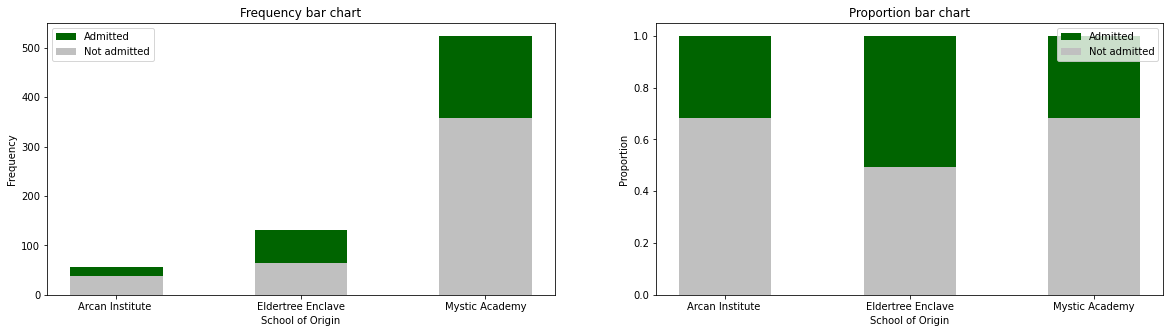

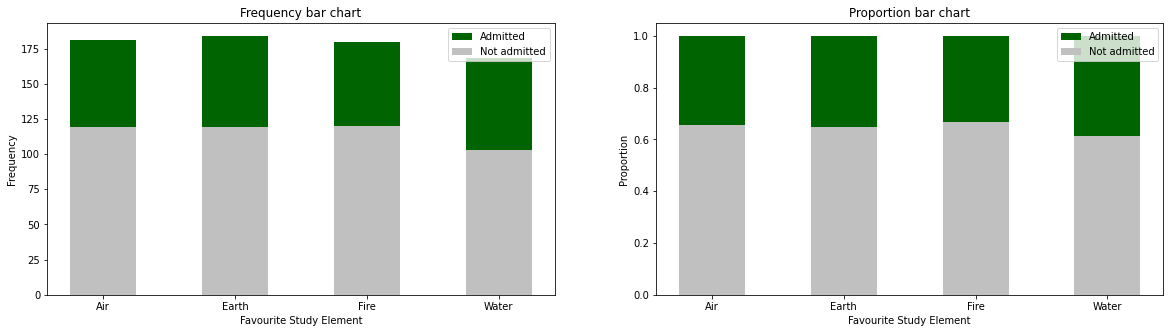

In [ ]:
categorical_features = ['Program', 'Student Gender','School of Origin', 'Favourite Study Element']
for column in categorical_features:
    stacked_bar_charts(train_data_copy, column, 'Admitted in School' )

All the features present an unbalanced distribution for each category, which might bias further analysis.

<a id="2.3"></a>     
    
## <font color='#00000'>2.3 Feature Engineering<font>

<b>Experience Level Category</b>

We've introduced a new feature named <u>Experience Level Category</u> to better understand the various stages of students' wizardry experience level.
<br>
This feature categorizes students into specific groups, providing insights into their progression within the wizardry school, in terms of their skill and knowledge.
<br>
The categories are defined as: Novice, Intermediate, Advanced and Master.

In [ ]:
train_data_copy['Experience Level Category'] = pd.qcut(train_data_copy['Experience Level'], q = [0, 0.2, 0.4, 0.6, 1],
                            labels = ['Novice', 'Intermediate', 'Advanced', 'Master'])

test_data_copy['Experience Level Category'] = pd.qcut(test_data_copy['Experience Level'], q = [0, 0.2, 0.4, 0.6, 1],
                            labels = ['Novice', 'Intermediate', 'Advanced', 'Master'])

categorical_features.append('Experience Level Category')

<b>Financial Background Category</b>

In our continuous efforts to enrich our analysis, we have introduced another feature called <u>Financial Background Category</u>.
<br>
This categorical variable is derived from the existing 'Financial Background' feature and classifies students into distinct groups, providing a more nuanced understanding of their economic circumstances.
<br>
The categories are defined as: Low, Medium and High.

In [ ]:
train_data_copy['Financial Background Category'] = pd.qcut(train_data_copy['Financial Background'], q = [0, 0.33, 0.66, 1], labels = ['Low', 'Medium', 'High'])

test_data_copy['Financial Background Category'] = pd.qcut(test_data_copy['Financial Background'], q = [0, 0.33, 0.66, 1], labels = ['Low', 'Medium', 'High'])

categorical_features.append('Financial Background Category')

<a id="2.4"></a>    
    
## <font color='#00000'>2.4 Data Partitioning<font>

In [ ]:
X = train_data_copy.drop('Admitted in School', axis = 1)
y = train_data_copy['Admitted in School']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.7, shuffle = True, random_state= 5, stratify = y)

<a id="2.5"></a>     
    
## <font color='#00000'>2.5 Encoding<font>

In [ ]:
# Categorical and numerical distinction
X_train_numerical = X_train.select_dtypes(include = np.number).set_index(X_train.index)
X_train_categorical = X_train.select_dtypes(exclude = np.number).set_index(X_train.index).drop(['Experience Level Binned', 'Financial Background Binned'], axis = 1)

X_val_numerical = X_val.select_dtypes(include = np.number).set_index(X_val.index)
X_val_categorical = X_val.select_dtypes(exclude = np.number).set_index(X_val.index).drop(['Experience Level Binned', 'Financial Background Binned'], axis = 1)

test_numerical = test_data_copy.select_dtypes(include = np.number).set_index(test_data_copy.index)
test_categorical = test_data_copy.select_dtypes(exclude = np.number).set_index(test_data_copy.index)

In [ ]:
# Applying the encoder to the training, validation and testing sets

Encoder = OneHotEncoder().fit(X_train_categorical)

# Training data
X_train_categorical_encoded = Encoder.transform(X_train_categorical).toarray()
X_train_categorical_encoded = pd.DataFrame(X_train_categorical_encoded, columns = Encoder.get_feature_names_out(categorical_features), index = X_train_categorical.index)

# Validation data
X_val_categorical_encoded = Encoder.transform(X_val_categorical).toarray()
X_val_categorical_encoded = pd.DataFrame(X_val_categorical_encoded, columns = Encoder.get_feature_names_out(categorical_features), index = X_val_categorical.index)

# Testing data
test_categorical_encoded = Encoder.transform(test_categorical).toarray()
test_categorical_encoded = pd.DataFrame(test_categorical_encoded, columns = Encoder.get_feature_names_out(categorical_features), index = test_categorical.index)


<a id="2.6"></a>     
    
## <font color='#00000'>2.6 Scaling<font>

Previously, it was concluded that some predictors contained outliers, such as, <u>Experience Level</u>, <u>Student Siblings</u>, <u>Student Family</u>, and <u>Financial Background</u>.
<br>
Recognizing that the presence of outliers can negatively affect predictive models, the data was scaled using the Robust Scaler, which, after careful analysis, was concluded to be the best at minimizing the influence of outliers.
<br>
It is important to note that only the non-boolean features were subjected to scaling.

In [ ]:
# Identify the columns to scale (excluding 'STUDENT ID')
numerical_columns = [col for col in X_train_numerical.columns if col != 'Student ID']

# Fitting the scaler on training data
robust_scaler = RobustScaler().fit(X_train_numerical[numerical_columns])

# Transforming training data
X_train_scaled = robust_scaler.transform(X_train_numerical[numerical_columns])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_columns).set_index(X_train_numerical.index)

# Transforming validation data
X_val_scaled = robust_scaler.transform(X_val_numerical[numerical_columns])
X_val_scaled = pd.DataFrame(X_val_scaled, columns=numerical_columns).set_index(X_val_numerical.index)

# Transforming test data
test_numerical_scaled = robust_scaler.transform(test_numerical[numerical_columns])
test_numerical_scaled = pd.DataFrame(test_numerical_scaled, columns=numerical_columns).set_index(test_numerical.index)


In [ ]:
test_final = test_numerical_scaled.join(test_categorical_encoded)

For the rest of this project we will primarily use the data scaled with Robust scaling.

<a id="3"></a>     
    
# **<font color='#00000'>3. Feature Selection<font>**

<a id="3.1"></a>     
    
## <font color='#00000'>3.1 Filter Methods<font>

<a id="3.1.1"></a>     
    
### <font color='#00000'>3.1.1 Univariate Variables<font>

In [ ]:
X_train_scaled.var().sort_values()

Student Social Influence    0.330371
Student Family              0.657459
Experience Level            0.976979
Student Siblings            1.319523
Financial Background        5.166239
dtype: float64


We conclude that all variables in the dataset exhibit non-zero variance, indicating diversity and variability in their values. This is beneficial for statistical analyses and modeling.

<a id="3.1.2"></a>     
    
### <font color='#00000'>3.1.2 Spearman's Correlation Analysis<font>

We will now examine the Spearman correlation between variables. To facilitate this analysis, a new dataframe has been created using all the training data, including the dependent variable. This inclusion allows us to investigate whether any of the independent variables exhibit correlations with the target variable. The Spearman correlation analysis provides valuable insights into potential monotonic relationships and aids in identifying key features that may influence the target variable.

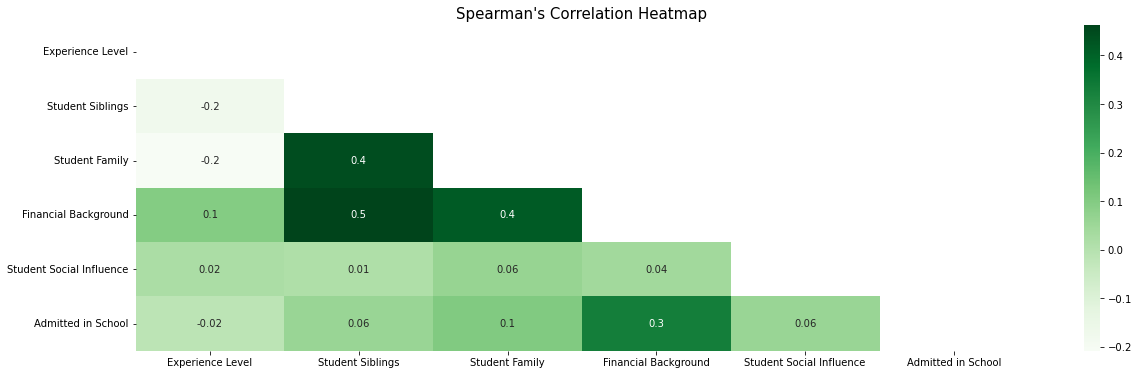

In [ ]:
# Joining the numeric observations with the outcome
all_train_numerical = X_train_scaled.join(y_train)

# Computing Spearman's Correlation
correlation = all_train_numerical.corr(method = 'spearman')

# Plotting the lower triangle of the correlation map
def corr_heatmap(correlation):
    plt.figure(figsize=(20, 6))
    ax = sns.heatmap(data = correlation, annot = True, mask = np.triu(np.ones_like(correlation)), cmap = 'Greens', fmt = '.1')
    ax.set_title("Spearman's Correlation Heatmap", fontdict = {'fontsize': 15})
    plt.show()

corr_heatmap(correlation)

In summary, the analysis reveals that no independent variable is highly correlated with the target variable. Despite this, a subtle correlation exists between <u>student family</u> and <u>financial background</u> with <u>student siblings</u> which aligns with logical expectations.

Given the absence of strong correlations, it is essential to employ alternative feature selection techniques to gain deeper insights into the dataset.

<a id="3.1.3"></a>     
    
### <font color='#00000'>3.1.3 Chi-Square Test<font>

Subsequently, the focus shifts to assessing the independence of categorical features concerning the target variable using a Chi-Squared test with a significance level of 5%. This statistical test aims to determine whether there is a significant association between categorical features and the target variable.

The function used for the Chi-Squared test has been extracted from machine learning lectures. This approach contributes to a comprehensive feature selection process, providing a solid foundation for subsequent modeling and analysis.

In [ ]:
def TestIndependence(X,y,var,alpha=0.05):
    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result = "{0} is an IMPORTANT predictor".format(var)
    else:
        result = "{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [ ]:
for variable in X_train_categorical.columns:
    TestIndependence(X_train_categorical[variable], y_train, variable)

Program is an IMPORTANT predictor
Student Gender is an IMPORTANT predictor
School of Origin is an IMPORTANT predictor
Favourite Study Element is NOT an important predictor. (Discard Favourite Study Element from model)
Experience Level Category is an IMPORTANT predictor
Financial Background Category is an IMPORTANT predictor


Based on the Chi-Squared test results, the recommendation is to exclude the <u>Favourite Study Element</u> from the final model.

<a id="3.2"></a>     
    
## <font color='#00000'>3.2 Wrapper Methods<font>

This section focuses on the adoption of Wrapper Methods for feature selection. By training diverse predictive models with varying feature combinations and comparing their performances, Wrapper Methods aim to identify the most impactful subset of features.

This iterative approach, characterized by its model-centric nature, ensures a meticulous evaluation aligned with the specific goals of our project.

Wrapper Methods offer a robust framework to discern the optimal set of features that will contribute most effectively to our model's overall performance.

In [ ]:
model = LogisticRegression()

<a id="3.2.1"></a>     
    
### <font color='#00000'>3.2.1 Recursive Feature Elimination (RFE)<font>

**Optimum number of features**

The subsequent function, derived from the lectures of the Machine Learning course, is designed to determine the optimal number of features to select using the **RFE** method. It utilizes a **Logistic Regression** instance as the underlying estimator.

In [ ]:
# Number of features
nof_list = np.arange(1,8)
high_score = 0

# Variable to store the optimum features
nof = 0
score_list = []
for n in range(len(nof_list)):
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_scaled)
    model.fit(X_train_rfe,y_train)

    score = model.score(X_val_rfe,y_val)
    score_list.append(score)

    if(score > high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.705607


The optimum number of features for this method if 5. Thus, 5 features will be selected by the Recursive Feature Elimination method.

**Selecting the Features**

In [ ]:
rfe = RFE(estimator = model, n_features_to_select = nof)
rfe_fitted = rfe.fit_transform(X_train_scaled, y_train)
selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
selected_features

Experience Level            True
Student Siblings            True
Student Family              True
Financial Background        True
Student Social Influence    True
dtype: bool

<a id="3.2.2"></a>     
    
### <font color='#00000'>3.2.2 Sequential Forward Selection (SFS)<font>

**Optimum number of features**


The code cell previously employed to identify the optimal number of features through RFE has been repurposed and adjusted to execute a similar procedure, but this time for <b>Forward / Sequential Feature Selection</b>.

In [ ]:
# Number of features
nof_list = np.arange(1, min(X_train_scaled.shape[1], 8))
high_score = 0
nof = 0
score_list = []

for n in range(len(nof_list)):
    sfs = SequentialFeatureSelector(model, n_features_to_select = nof_list[n])
    X_train_sfs = sfs.fit_transform(X_train_scaled, y_train)
    X_val_sfs = sfs.transform(X_val_scaled)
    model.fit(X_train_sfs, y_train)

    score = model.score(X_val_sfs, y_val)
    score_list.append(score)

    if score > high_score:
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 2
Score with 2 features: 0.686916


The optimum number of features for this method is 2. Thus, 2 features will be selected by the Sequential Feature Selection method.

**Selecting the Features**

In [ ]:
sfs = SequentialFeatureSelector(estimator = model, n_features_to_select = nof)
sfs_fitted = sfs.fit_transform(X_train_scaled, y_train)
selected_features = pd.Series(sfs.support_, index = X_train_scaled.columns)
selected_features

Experience Level            False
Student Siblings            False
Student Family              False
Financial Background         True
Student Social Influence     True
dtype: bool

<a id="3.3"></a>     
    
## <font color='#00000'>3.3 Embedded Methods<font>

Moreover, Embedded Methods were utilized. This technique involves selecting features during the training of predictive models, taking into account their importance.

<a id="3.3.1"></a>     
    
### <font color='#00000'>3.3.1 Lasso Regression<font>

The following function was extracted from the Machine Learning classes and serves the purpose of visualizing the features importance according to the **Lasso Regression**.

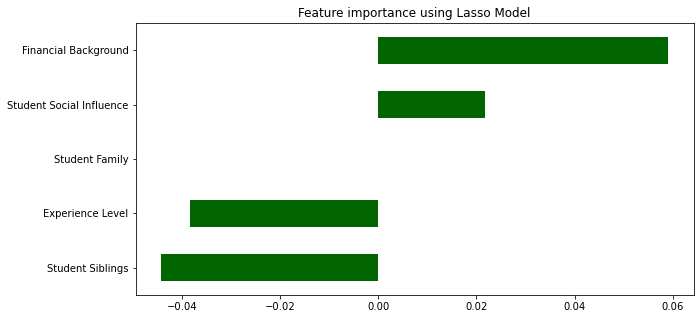

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize = (10, 5))
    imp_coef.plot(kind = "barh", color = 'darkgreen')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

reg = LassoCV()

reg.fit(X_train_scaled, y_train)

coef = pd.Series(reg.coef_, index = X_train_scaled.columns)

plot_importance(coef,'Lasso')

According to Lasso Regression, we should discard the **Student Family** variable, since it seems insignificant for the definition of the target comparing to the remaining predictors.

<a id="3.3.2"></a>     
    
### <font color='#00000'>3.3.2 Decision Tree<font>

To mitigate ambiguity and address potential ties arising from the previously described Feature Selection techniques, a Decision Tree was trainned on the filtered data.

<AxesSubplot:xlabel='Value', ylabel='Features'>

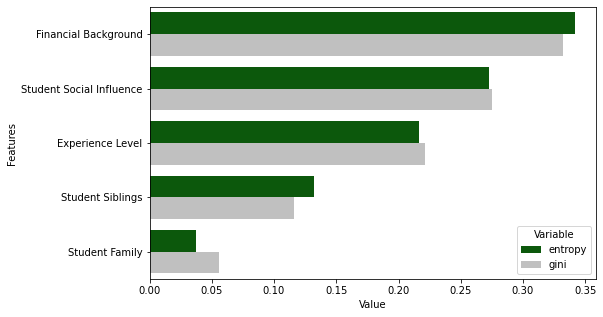

In [ ]:
gini_importance = DecisionTreeClassifier(splitter='random', random_state=42).fit(X_train_scaled, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=42).fit(X_train_scaled, y_train).feature_importances_

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns=['gini', 'entropy'])
zippy['Features'] = X_train_scaled.columns
tidy = zippy.melt(id_vars='Features').rename(columns=str.title)
tidy.sort_values(['Value'], ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(y='Features', x='Value', hue='Variable', data=tidy, palette=['darkgreen', 'silver'])

The role of the **Student Family** variable remains identified as the least influencial predictor.

<a id="3.4"></a>     
    
## <font color='#00000'>3.4 Final Insights<font>

| Numerical Data |  Spearman's Correlation | RFE | SFS | Lasso | Decision Tree | Relevance |
| --- | --- | --- | --- | --- | --- | --- |
|  Experience Level | Discard |  Keep | Discard | Keep | Keep | **Keep** |
|  Student Family | Discard |  Keep | Discard | Discard | Discard | **Discard** |
|  Student Siblings | Discard  |  Keep | Discard| Keep | Discard | **Discard** |
|  Student Social Influence | Discard  |  Keep | Keep | Keep | Keep | **Keep** |
|  Financial Background  | Discard |  Keep | Keep| Keep | Keep | **Keep** |

<br>

| Categorical Data | Chi-Square |  Relevance |
| --- | --- | --- |
| Program | Keep |  **Keep**  |
| Student Gender | Keep  | **Keep** |
| School of Origin | Keep |  **Keep**  |
| Favourite Study Element | Discard | **Discard** |
| Experience Level Category | Keep | **Keep** |
| Financial Category | Keep | **Keep** |

In [ ]:
# Join the scaled numerical data with the enconded categorical data

# Training data
X_train_join = X_train_scaled.join(X_train_categorical_encoded)

# Validation data
X_val_join = X_val_scaled.join(X_val_categorical_encoded)

In [ ]:
# Check the joinned datasets
display(X_train_join.head())
display(X_val_join.head())

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Program_Magi Academy,Program_Sorcery School,Program_Witchcraft Institute,Student Gender_female,Student Gender_male,...,Favourite Study Element_Earth,Favourite Study Element_Fire,Favourite Study Element_Water,Experience Level Category_Advanced,Experience Level Category_Intermediate,Experience Level Category_Master,Experience Level Category_Novice,Financial Background Category_High,Financial Background Category_Low,Financial Background Category_Medium
537,0.000000,1.0,0.0,1.730840,0.500000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
179,0.008413,0.0,0.0,-0.149114,0.833333,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
358,1.700721,0.0,0.0,0.756888,0.333333,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
638,0.000000,8.0,2.0,2.525857,-0.916667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
699,0.000000,0.0,0.0,-0.194414,-0.416667,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Program_Magi Academy,Program_Sorcery School,Program_Witchcraft Institute,Student Gender_female,Student Gender_male,...,Favourite Study Element_Earth,Favourite Study Element_Fire,Favourite Study Element_Water,Experience Level Category_Advanced,Experience Level Category_Intermediate,Experience Level Category_Master,Experience Level Category_Novice,Financial Background Category_High,Financial Background Category_Low,Financial Background Category_Medium
573,0.931490,0.0,0.0,0.566061,-0.666667,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
673,-0.683894,0.0,0.0,-0.232353,0.666667,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
614,-0.760817,0.0,0.0,-0.297282,-0.333333,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
285,0.000000,0.0,0.0,-0.297472,-0.750000,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
260,-0.606971,0.0,0.0,-0.296340,0.833333,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


The code bellow is designed to eliminate variables that have been identified for exclusion, based on the tables obtained above.

In [ ]:
selected_features = list(X_train_join.columns)

In [ ]:
# Columns to remove. Note that we will remove the encoded version of the variables.
columns_to_remove = ['Favourite Study Element_Earth',
                     'Favourite Study Element_Air',
                     'Favourite Study Element_Water',
                     'Favourite Study Element_Fire',
                     'Student Family',
                     'Student Siblings']

In [ ]:
# Update the 'selected_features' by removing the ones that were discarded
selected_features = [column for column in selected_features if column not in columns_to_remove]

# Update DataFrames
X_train_join = X_train_join[selected_features]
X_val_join = X_val_join[selected_features]
test_final = test_final[selected_features]

<a id="4">  
    
# **<font color='#00000'>4. Model Experimentation and Criteria for Evaluation<font>**

<a id="4.1"></a>     
    
## <font color='#00000'>4.1. Model Choice<font>

In this section, a comprehensive series of tests is conducted to determine the optimal model, highlighting its superior performance among the alternatives considered.

In [ ]:
# Logistic Regression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train_join, y_train)
parameters_Logistic_Regression = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2', 'elasticnet', 'none'],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter': [50, 100, 150, 200]}

# Decision Tree Classifier
Decision_Tree_Classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_leaf_nodes = 7, min_samples_split = 2)
Decision_Tree_Classifier.fit(X_train_join, y_train)
parameters_Decision_Tree_Classifier =  {'criterion':['log_loss', 'gini', 'entropy'],'max_depth':np.arange(1,21).tolist()[0::2],'min_samples_split':np.arange(2,11).tolist()[0::2],'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# Gaussian Naive Bayes
Gaussian_Naive_Bayes = GaussianNB(priors = [0.5, 0.5], var_smoothing = 1e-09)
Gaussian_Naive_Bayes.fit(X_train_join, y_train)
parameters_Gaussian_Naive_Bayes = {'priors': [None, [0.2, 0.8], [0.5, 0.5]], 'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Support Vector Classifier
Support_Vector_Classifier = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
Support_Vector_Classifier.fit(X_train_join, y_train)
parameters_Support_Vector_Classifier = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

# Multilayer Perceptron Classifier
Multilayer_Perceptron_Classifier = MLP(activation= "relu", alpha= 0.0001, hidden_layer_sizes= (100,), learning_rate= "constant", solver= "adam")
Multilayer_Perceptron_Classifier.fit(X_train_join,y_train)
parameters_Multilayer_Perceptron_Classifier = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],'activation': ['tanh', 'relu'],'solver': ['sgd', 'adam'],'alpha': [0.0001, 0.05],'learning_rate': ['constant','adaptive'],}

# Random Forest Classifier
Random_Forest_Classifier  = RandomForestClassifier(max_depth = 6, max_features = None, max_leaf_nodes = 9, n_estimators = 50)
Random_Forest_Classifier.fit(X_train_join, y_train)
parameters_Random_Forest_Classifier = { 'n_estimators': [25, 50, 100, 150], 'max_features': ['sqrt', 'log2', None], 'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9], }

# Gradient Boosting Classifier
Gradient_Boosting_Classifier = GradientBoostingClassifier(learning_rate = 0.05, loss = 'exponential', max_depth = 9, max_leaf_nodes = 9, n_estimators = 100)
Gradient_Boosting_Classifier.fit(X_train_join, y_train)
parameters_Gradient_Boosting_Classifier= {'loss': ['deviance', 'exponential'], 'learning_rate': [0.1, 0.05, 0.01], 'n_estimators': [100, 150, 200], 'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9]}

# Adaptive Boosting Classifier
Adaptive_Boosting_Classifier = AdaBoostClassifier(algorithm = 'SAMME', base_estimator = LogisticRegression(), learning_rate = 0.05, n_estimators = 150)
Adaptive_Boosting_Classifier.fit(X_train_join, y_train)
parameters_Adaptive_Boosting_Classifier = {'base_estimator':[DecisionTreeClassifier(),LogisticRegression()],'n_estimators': [25, 50, 100, 150], 'learning_rate': [0.1, 0.05, 0.01], 'algorithm': ['SAMME', 'SAMME.R']}

# Extra Trees Classifier
Extra_Trees_Classifier = ExtraTreesClassifier(max_depth = 9, max_features = None, max_leaf_nodes = 9, n_estimators = 25)
Extra_Trees_Classifier.fit(X_train_join, y_train)
parameters_Extra_Trees_Classifier = {'n_estimators': [25, 50, 100, 150], 'max_features': ['sqrt', 'log2', None], 'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9]}

# XGB Classifier
XGB_Classifier = XGBClassifier(colsample_bytree = 0.7, gamma = 0, learning_rate = 0.1, max_depth = 9, n_estimators = 25)
XGB_Classifier.fit(X_train_join, y_train)
parameters_XGB_Classifier = {'n_estimators': [25, 50, 100, 150], 'max_depth': [3, 6, 9], 'learning_rate': [0.1, 0.05, 0.01], 'gamma': [0, 0.1, 0.2, 0.3], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

By creating an instance of the model, fitting it to the data and defining a dictionary of hyperparameters, we are setting the stage for conducting a grid search, as seen in the following cells:

In [ ]:
Best_Logistic_Regression = GridSearchCV(estimator = LogisticRegression(), param_grid = parameters_Logistic_Regression, scoring = 'f1', verbose = True).fit(X_train_join, y_train)
display(Best_Logistic_Regression.best_params_)
display(Best_Logistic_Regression.best_score_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


{'C': 0.001, 'max_iter': 150, 'penalty': 'none', 'solver': 'sag'}

0.7294000599767958

In [ ]:
Best_Decision_Tree_Classifier = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = parameters_Decision_Tree_Classifier, scoring = 'f1', verbose = True).fit(X_train_join, y_train)
display(Best_Decision_Tree_Classifier.best_params_)
display(Best_Decision_Tree_Classifier.best_score_)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 7,
 'min_samples_split': 2}

0.7607845230246519

In [ ]:
Best_Gaussian_Naive_Bayes = GridSearchCV(estimator = GaussianNB(), param_grid = parameters_Gaussian_Naive_Bayes, scoring = 'f1', verbose=True).fit(X_train_join, y_train)
display(Best_Gaussian_Naive_Bayes.best_params_)
display(Best_Gaussian_Naive_Bayes.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'priors': [0.5, 0.5], 'var_smoothing': 1e-09}

0.6630898935122123

In [ ]:
Best_Support_Vector_Classifier = GridSearchCV(estimator = SVC(), param_grid = parameters_Support_Vector_Classifier, scoring = 'f1', verbose = True).fit(X_train_join, y_train)
display(Best_Support_Vector_Classifier.best_params_)
display(Best_Support_Vector_Classifier.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

0.7324775638057105

In [ ]:
Best_Multilayer_Perceptron_Classifier = GridSearchCV(estimator = MLP(), param_grid = parameters_Multilayer_Perceptron_Classifier, scoring = 'f1', verbose = True).fit(X_train_join, y_train)
display(Best_Multilayer_Perceptron_Classifier.best_params_)
display(Best_Multilayer_Perceptron_Classifier.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'adam'}

0.754915084915085

In [ ]:
Best_Random_Forest_Classifier = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters_Random_Forest_Classifier, scoring = 'f1', verbose = True).fit(X_train_join, y_train)
display(Best_Random_Forest_Classifier.best_params_)
display(Best_Random_Forest_Classifier.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}

0.7246440562709848

In [ ]:
Best_Gradient_Boosting_Classifier = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = parameters_Gradient_Boosting_Classifier, scoring = 'f1', verbose = True).fit(X_train_join, y_train)
display(Best_Gradient_Boosting_Classifier.best_params_)
display(Best_Gradient_Boosting_Classifier.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


{'learning_rate': 0.05,
 'loss': 'exponential',
 'max_depth': 6,
 'max_leaf_nodes': 9,
 'n_estimators': 200}

0.7470335094642454

In [ ]:
Best_Adaptive_Boosting_Classifier = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = parameters_Adaptive_Boosting_Classifier, scoring = 'f1', verbose = True).fit(X_train_join, y_train)
display(Best_Adaptive_Boosting_Classifier.best_params_)
display(Best_Adaptive_Boosting_Classifier.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'algorithm': 'SAMME',
 'base_estimator': LogisticRegression(),
 'learning_rate': 0.05,
 'n_estimators': 150}

0.7064958946541227

In [ ]:
Best_Extra_Trees_Classifier = GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = parameters_Extra_Trees_Classifier, scoring = 'f1', verbose = True).fit(X_train_join, y_train)
display(Best_Extra_Trees_Classifier.best_params_)
display(Best_Extra_Trees_Classifier.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 50}

0.744318953023163

In [ ]:
Best_XGB_Classifier = GridSearchCV(estimator = XGBClassifier(), param_grid = parameters_XGB_Classifier, scoring = 'f1', verbose = True).fit(X_train_join, y_train)
display(Best_XGB_Classifier.best_params_)
display(Best_XGB_Classifier.best_score_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


{'colsample_bytree': 0.7,
 'gamma': 0.3,
 'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 100}

0.7445049183283416

In [ ]:
labels = ['Logistic Regression', 'Decision Tree Classifier', 'Gaussian Naive Bayes', 'Support Vector Classifier', 'Multilayer Perceptron Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Adaptive Boosting Classifier', 'Extra Trees Classifier', 'XGB Classifier']

# Prediction results on training data
def predict_and_results_train(list_of_models):

    f1, balanced_accuracy, precision, recall = {}, {}, {}, {}

    for model, label in zip(list_of_models, labels):
        predictions_train = model.predict(X_train_join)

        f1[label] = f1_score(y_train, predictions_train)

        balanced_accuracy[label] = balanced_accuracy_score(y_train, predictions_train)

        precision[label] = precision_score(y_train, predictions_train)

        recall[label] = recall_score(y_train, predictions_train)

        results = pd.DataFrame.from_dict({'F1 Score': f1, 'Balanced Accuracy': balanced_accuracy, 'Precision': precision, 'Recall': recall})
    return results

# Prediction results on validation data
def predict_and_results_val(list_of_models):

    f1, balanced_accuracy, precision, recall = {}, {}, {}, {}

    for model, label in zip(list_of_models, labels):
        predictions_val = model.predict(X_val_join)

        f1[label] = f1_score(y_val, predictions_val)

        balanced_accuracy[label] = balanced_accuracy_score(y_val, predictions_val)

        precision[label] = precision_score(y_val, predictions_val)

        recall[label] = recall_score(y_val, predictions_val)

        results = pd.DataFrame.from_dict({'F1 Score': f1, 'Balanced Accuracy': balanced_accuracy, 'Precision': precision, 'Recall': recall})
    return results

print('Prediction Results on Training Data')
display(predict_and_results_train([Best_Logistic_Regression, Best_Decision_Tree_Classifier, Best_Gaussian_Naive_Bayes, Best_Support_Vector_Classifier, Best_Multilayer_Perceptron_Classifier, Best_Random_Forest_Classifier, Best_Gradient_Boosting_Classifier, Best_Adaptive_Boosting_Classifier, Best_Extra_Trees_Classifier, Best_XGB_Classifier]))
print('Prediction Results on Validation Data')
display(predict_and_results_val([Best_Logistic_Regression, Best_Decision_Tree_Classifier, Best_Gaussian_Naive_Bayes, Best_Support_Vector_Classifier, Best_Multilayer_Perceptron_Classifier, Best_Random_Forest_Classifier, Best_Gradient_Boosting_Classifier, Best_Adaptive_Boosting_Classifier, Best_Extra_Trees_Classifier, Best_XGB_Classifier]))

Prediction Results on Training Data


,F1 Score,Balanced Accuracy,Precision,Recall
Logistic Regression,0.765060,0.815904,0.814103,0.721591
Decision Tree Classifier,0.788406,0.835280,0.804734,0.772727
Gaussian Naive Bayes,0.663158,0.737212,0.617647,0.715909
Support Vector Classifier,0.783439,0.826212,0.891304,0.698864
Multilayer Perceptron Classifier,0.822086,0.855914,0.893333,0.761364
Random Forest Classifier,0.782609,0.826995,0.863014,0.715909
Gradient Boosting Classifier,0.901493,0.916593,0.949686,0.857955
Adaptive Boosting Classifier,0.725275,0.788313,0.702128,0.750000
Extra Trees Classifier,0.765273,0.813300,0.881481,0.676136
XGB Classifier,0.928571,0.936990,0.975000,0.886364


Prediction Results on Validation Data


,F1 Score,Balanced Accuracy,Precision,Recall
Logistic Regression,0.635659,0.726259,0.773585,0.539474
Decision Tree Classifier,0.700000,0.768021,0.765625,0.644737
Gaussian Naive Bayes,0.641975,0.718917,0.604651,0.684211
Support Vector Classifier,0.688000,0.761156,0.877551,0.565789
Multilayer Perceptron Classifier,0.676692,0.752574,0.789474,0.592105
Random Forest Classifier,0.682171,0.756865,0.830189,0.578947
Gradient Boosting Classifier,0.710145,0.775267,0.790323,0.644737
Adaptive Boosting Classifier,0.652778,0.733124,0.691176,0.618421
Extra Trees Classifier,0.661417,0.743707,0.823529,0.552632
XGB Classifier,0.700730,0.768688,0.786885,0.631579


<a id="4.2"></a>    
    
## <font color='#00000'>4.2 Fitting the Model<font>

According to the results obtained, the best model will be <b>DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_leaf_nodes = 7, min_samples_split = 2)<b>

In [ ]:
final_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_leaf_nodes = 7, min_samples_split = 2)
final_model.fit(X_train_join, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=7)

<a id="4.3"></a>     
    
## <font color='#00000'>4.3 Evaluating the Model<font>

In [ ]:
# Apply the K Fold and the Repeated K Fold in the model

kf = KFold(n_splits = 10,random_state = 42, shuffle = True)
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3,random_state = 42)

def eval_model_clf(X, y, model):
    y_pred = model.predict(X)
    return f1_score(y, y_pred, average='binary')
def run_model(X, y, model):
    return model.fit(X,y)

def avg_score_clf(method, X, y, model):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        train_model = run_model(X_train, y_train, model)
        value_train = eval_model_clf(X_train, y_train, train_model)
        value_test = eval_model_clf(X_test, y_test, train_model)

        score_train.append(value_train)
        score_test.append(value_test)

    mean_train_score = np.mean(score_train)
    mean_test_score = np.mean(score_test)

    result_df = pd.DataFrame({'Train F1 Score': [mean_train_score], 'Test F1 Score': [mean_test_score]})
    result_df.index = [f'{str(model)} with {str(method)}']

    return result_df


In [ ]:
final_model_train_f1 = eval_model_clf(X_train_join, y_train, final_model)
final_model_test_f1 = eval_model_clf(X_val_join, y_val, final_model)
final_model_df = pd.DataFrame({'Train F1 Score': [final_model_train_f1], 'Test F1 Score': [final_model_test_f1]})
final_model_df.index = [f"{str(final_model)} with Simple Data Split"]

final_model_kf_df = avg_score_clf(kf, X_train_join, y_train,final_model)
final_model_rkf_df = avg_score_clf(rkf, X_train_join, y_train,final_model)

df_final_model = pd.concat([final_model_df, final_model_kf_df, final_model_rkf_df])

In [ ]:
df_final_model

,Train F1 Score,Test F1 Score
"DecisionTreeClassifier(max_depth=5, max_leaf_nodes=7) with Simple Data Split",0.788406,0.700000
"DecisionTreeClassifier(max_depth=5, max_leaf_nodes=7) with KFold(n_splits=10, random_state=42, shuffle=True)",0.781684,0.746146
"DecisionTreeClassifier(max_depth=5, max_leaf_nodes=7) with RepeatedKFold(n_repeats=3, n_splits=5, random_state=42)",0.781439,0.723477


In [ ]:
def predict_and_results_metrics(final_model):
    predictions_train = final_model.predict(X_train_join)
    predictions_validation = final_model.predict(X_val_join)

    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, predictions_train))
    print('Confusion Matrix:\n', confusion_matrix(y_train, predictions_train))

    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, predictions_validation))
    print('Confusion Matrix:\n', confusion_matrix(y_val, predictions_validation))


In [ ]:
display(predict_and_results_metrics(final_model))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.88      0.90      0.89       323
        True       0.80      0.77      0.79       176

    accuracy                           0.85       499
   macro avg       0.84      0.84      0.84       499
weighted avg       0.85      0.85      0.85       499

Confusion Matrix:
 [[290  33]
 [ 40 136]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------------------

None

<a id="4.4"></a>     
    
## <font color='#00000'>4.4. Making Predictions<font>

In [ ]:
test_final['Admitted in School'] = final_model.predict(test_final)

<a id="5"></a>     
    
## <font color='#00000'>5. Extracting the Predictions<font>

In [ ]:
# Create a new DataFrame for predictions including 'Student ID'
#final_predictions = pd.DataFrame({'Student ID': test_data_copy['Student ID'], 'Admitted in School': test_final['Admitted in School']})

# Save the DataFrame to a CSV file
#final_predictions.to_csv('Group08_version36.csv', index=False)